In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab02.ipynb")

# CE 93: Lab Assignment 02

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to compute numerical summaries of data in Python and to plot graphical summaries.

## Instructions 
**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and theses should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

**Run the cell below**, to import the required modules.

In [2]:
# Please run this cell, and do not modify the contents
import math
import numpy as np
import scipy
import pandas as pd
import statistics as stats
import cmath
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import hashlib
import ipywidgets as widgets
from ipywidgets import FileUpload
from IPython.display import display
from PIL import Image
import os
import resources

def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

### Introduction

In this lab, we will be working with a data set of Biochemical oxygen demand (BOD), Nitrates, and Ammonia measurements along the Blackwater River. Biochemical oxygen demand, or BOD, is a measurement of the amount of oxygen consumed by the microorganisms in decomposing organic matter in some volume of water. Additionally, BOD can also be used to measure the extraction of oxygen from water via oxidation of inorganic matter, a chemical reaction as opposed to a biological one. 

<center><img src='resources/intro.png' width=55%/></center>  
 
From EPA: Water Monitoring and Assessment: 
“BOD directly affects the amount of dissolved oxygen in rivers and streams. The greater the BOD, the more rapidly oxygen is depleted in the stream. This means less oxygen is available to higher forms of aquatic life. The consequences of high BOD are the same as those for low dissolved oxygen: aquatic organisms become stressed, suffocate, and die.”


Nitrates are a very common contaminant of drinking water, especially in rural areas near agriculture. The primary sources of nitrate contamination are fertilizer, sewage, and manure. Federal regulations for nitrates were put in place because high nitrate levels can result in methemoglobinemia, or "blue baby" disease. They are also an indicator for other major agricultural contaminants, such as pesticides and bacteria. 


Ammonia in waterways is the result of industrial processes, wastes, and fertilizers, as well as a byproduct of drinking water disinfection with chloramines. Ammonia is toxic for aquatic life, especially in oxygen-poor environments.


For Civil and Environmental Engineers, BOD, Nitrates, and Ammonia measurements are critical to protect the health of waterways that are impacted by various organic and inorganic pollution. The consequences of high BOD could be species depletion, damaged ecosystems, polluted water, regulatory challenges, and criminal investigations.  

### Load the data

Let's load the provided data set `nutrients.csv`. These are all the features:

| Feature  | Units | Description                            |
| :-       | :-    | :-                                     |
| BOD      | mg/L  | Biochemical oxygen demand measurements |
| Nitrates | mg/L  | Nitrates measurements                  |
| Ammonia  | mg/L  | Ammonia measurements                   |

* Load the data using the Pandas `pd.read_csv()` function

Run the cell below, which reads the data and saves it as a variable named `df`.

In [3]:
# read a .csv file as a DataFrame
df = pd.read_csv('resources/nutrients.csv')

# returns the first 5 rows of the data set by default
df.head()

,BOD(mg/L),Nitrates(mg/L),Ammonia(mg/L)
0,2.27,1.97,0.11
1,4.41,12.83,0.61
2,4.03,11.11,0.53
3,3.75,9.86,0.47
4,3.37,9.54,0.62


### Dataframe Shape

Let's check the shape (number of rows and columns) of our data set.

To get the shape of a DataFrame, use `DataFrame.shape`, where `DataFrame` should be replaced with the variable name of your data (see the cell above). The `.shape` attribute returns a tuple that includes the number of rows as the first element and the number of columns as the second element: `(rows, columns)`.

<font color='red'>**Question 1.0.**</font> What is the shape of this data set? Assign the shape to `q1_0`. Use the method above to determine the shape. Do not just type the answer. (0.25 pts)

Replace the `...` with your code.

In [4]:
# ANSWER CELL
q1_0 = df.shape # SOLUTION
q1_0

(38, 3)

In [5]:
grader.check("q1.0")

q1.0 results: All test cases passed!
q1.0 - 1 message: Correct answer format.

### Column Labels

Each column in a DataFrame has a label/name. Getting column labels is useful when you want to access a specific column by name.
Let's check the column labels of the Dataframe.

* Get column names using the `.columns` attribute

The column labels will appear between square brackets after running the cell below.

In [6]:
# return the column labels of the Dataframe
df.columns

Index(['BOD(mg/L)', 'Nitrates(mg/L)', 'Ammonia(mg/L)'], dtype='object')

So we have three columns, with labels: 
1. 'BOD(mg/L)'
2. 'Nitrates(mg/L)'
3. 'Ammonia(mg/L)'

### Indexing Values

If you want to get a specific value from the DataFrame (formally known as indexing), let's say the value for row 10 and column 10, you can NOT use `DataFrame[9, 9]`, like you would for a NumPy array. DataFrames are not two-dimensional arrays, although they share some similarities. 

So let's see how to do it. There are multiple ways to select and index rows and columns from DataFrames.

You can index a DataFrame using `DataFrame['column label'][row]`. This will return the value of the column with the label 'column label' at row = row + 1. Remember that Python is 0-indexed. So [0] corresponds to the first row, [1] corresponds to the second row, and so on. You need to use the exact column label (aka, name). You can refer to the output above for the three column labels of our DataFrame.

So, if we want the Nitrate value for the fifth row, we would use: `df['Nitrates(mg/L)'][4]` or `df[df.columns[1]][4]` (both will return same answer).
* Note that we are using `df.columns[1]` because Nitrates are in the second column of the DataFrame (again, 0-indexing).
* Note that we are using `[4]` to get the fifth column because Python is 0-indexed.

There are more ways to index a DataFrame, but we will use this for now.

<font color='red'>**Question 1.1.**</font> What is the BOD in mg/L for the 30$^{th}$ row? You can refer to the column labels in the previous code cell. You can see that the first label is for BOD, so BOD is in the first column. Assign the value to `q1_1`. Use the method above to determine the value. Do not just type the answer. (0.25 pts)

Replace the `...` with your code.

In [7]:
# ANSWER CELL
q1_1 = df[df.columns[0]][29] # SOLUTION
q1_1

2.86

In [8]:
grader.check("q1.1")

q1.1 results: All test cases passed!

### Create Variables from the DataFrame

We will be working with different columns of the DataFrame (biochemical oxygen demand, nitrates, and ammonia). So, let's create different variables for each column in the Dataframe.

We can do this in two different ways.
* Using `DataFrame['column label']`
* Or if you don't want to type out the full column labels, you can use `DataFrame[DataFrame.columns[column]]`, where `[column]` would be the integer index of the column you want. Remember, indexing starts at 0!

<font color='red'>**Question 1.2.**</font> Assign the values of biochemical oxygen demand, nitrates, and ammonia to the variables `bod`, `nit`, `amm`, respectively. (0.5 pts)

Replace the `...` with your code.

In [9]:
# ANSWER CELL
# create variables for biochemical oxygen demand, nitrates, and ammonia
# bod is already created for you
# replace ... with your code to create nit and amm

bod = df[df.columns[0]] # or df['BOD(mg/L)']
nit = df[df.columns[1]] # SOLUTION
amm = df[df.columns[2]] # SOLUTION

In [10]:
grader.check("q1.2")

q1.2 results: All test cases passed!

### Check your answer to Question 1.1.

You can check your answer to Question 1.1. using `bod[row]`, where row would be the **index** (i.e., row number - 1) of the row you are interested in. You do not need to save it as a variable. This is just for you to double check your answer.

In [11]:
# return BOD value for the 30th row
...

### Numerical Summaries Using `stats` Module

In this part, we will calculate different measures of central tendency and variability for the `nit` data using the `stats` module.

* Use the `stats.mean()` function to get mean value
* Use the `stats.median()` function to get median
* Use the `stats.variance()` function to get sample variance
* Use the `stats.stdev()` function to get sample standard deviation
* (Not required in the questions) You can use the `stats.mode()` function to get mode

So, to get the mode of ammonia, we can use `stats.mode(amm)`, where `amm` is the name of the variable you created above that includes the ammonia measurements.

<font color='red'>**Question 2.0.**</font> Answer the following questions. For each question, do not just manually type the numeric answer. Use the methods above to determine the value. 
* What is the mean of nitrates? Assign your answer to `mean_nit`. (0.25 pts)
* What is the median of nitrates? Assign your answer to `median_nit`. (0.25 pts)
* Is the mean of nitrates less than its median? Construct a logical expression that returns `True` or `False` to answer this question and assign the expression to `q2_0`. (0.25 pts)
* What is the variance of nitrates? Assign your answer to `var_nit`. (0.25 pts)
* What is the standard deviation of nitrates? Assign your answer to `stdev_nit`. (0.25 pts)
* What is the coefficient of variation of nitrates? Compute this value as a decimal and not a percentage. Assign your answer to `cv_nit`. (0.5 pts)

In [12]:
# ANSWER CELL
# calculate the mean of nitrates
mean_nit = stats.mean(nit) # SOLUTION
print(f'Mean: {mean_nit:.3f}') if not isinstance(mean_nit, type(Ellipsis)) else None

# calculate the median of nitrates
median_nit = stats.median(nit) # SOLUTION
print(f'Median: {median_nit:.3f}') if not isinstance(median_nit, type(Ellipsis)) else None

# compare the mean and median of nitrates
q2_0 = mean_nit < median_nit # SOLUTION
print(f'The mean is less than the median: {q2_0}') if not isinstance(q2_0, type(Ellipsis)) else None

# calculate the variance of nitrates
var_nit = stats.variance(nit) # SOLUTION
print(f'Variance: {var_nit:.3f}') if not isinstance(var_nit, type(Ellipsis)) else None

# calculate the standard deviation of nitrates
stdev_nit = stats.stdev(nit) # SOLUTION
print(f'Standard deviation: {stdev_nit:.3f}') if not isinstance(stdev_nit, type(Ellipsis)) else None

# calculate the coefficient of variation of nitrates
cv_nit = stdev_nit / mean_nit # SOLUTION
print(f'Coefficient of variation: {cv_nit:.3f}') if not isinstance(cv_nit, type(Ellipsis)) else None

Mean: 8.533
Median: 8.715
The mean is less than the median: True
Variance: 2.564
Standard deviation: 1.601
Coefficient of variation: 0.188


In [13]:
grader.check("q2.0")

q2.0 results: All test cases passed!

As scientists and engineers, never report data or measurements without explicitly stating the corresponding units, unless the value is unitless. Including units is crucial for ensuring the accuracy, clarity, and reproducibility of scientific findings. Omitting units can lead to confusion, misinterpretation, and potential errors in analyses. If I ask you to design a structure that can withstand a load equal to 2, how would you proceed? Is it 2 kN? 2 ton? 2 kips? The unit matters.


Therefore, as a fundamental practice in scientific communication, always accompany numerical data with their appropriate units to maintain precision and enhance the overall reliability of research outcomes.

<font color='red'>**Question 2.1.**</font> Answer the following questions:

* What are the units of the variance of nitrates? Assign your answer to the variable `units_var` as a string. (0.25 pts)

    **A.** $mg/L$ \
    **B.** $mg^2/L^2$ \
    **C.** $mg/L^2$ \
    **D.** $mg^2/L$ \
    **E.** Unitless
    
    
* What are the units of the coefficient of variation of nitrates? Assign your answer to the variable `units_cv` as a string. (0.5 pts)

    **A.** $mg/L$ \
    **B.** $mg^2/L^2$ \
    **C.** $mg/L^2$ \
    **D.** $mg^2/L$ \
    **E.** Unitless

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

In [14]:
# ANSWER CELL
units_var = "B" # SOLUTION
units_cv = "E" # SOLUTION
f'Units variance: {units_var}, Units coefficient of variation: {units_cv}'

'Units variance: B, Units coefficient of variation: E'

In [15]:
grader.check("q2.1")

q2.1 results: All test cases passed!
q2.1 - 1 message: Correct answer format.

### Numerical Summaries Using `numpy` Package

Numerical summaries can also be calculated using the `numpy` package. However, it is important to understand any possible differences between packages. Let's look at an example also for the `nit` data.

* Use the `np.std()` function with the default parameters

<font color='red'>**Question 3.0.**</font> Answer the following questions. For each question, do not just manually type the numeric answer. Use the methods above to determine the value. 
* What is the standard deviation of nitrates using `np.std()`? Assign your answer to `stdev_nit_np`. (0.4 pts)
* Are the standard deviations computed using `stats` module (saved as variable `stdev_nit`) and `numpy` (saved as variable `stdev_nit_np`) package equal? Construct a logical expression to answer this question and assign it to `q3_0`. (0.1 pts)

In [16]:
# ANSWER CELL
# calculate the variance of nitrates
stdev_nit_np = np.std(nit) # SOLUTION
print(f'Standard deviation using numpy: {stdev_nit_np:.3f}')

# compare the standard deviation
q3_0 = stdev_nit_np == stdev_nit # SOLUTION
print(f'The standard deviation computed using numpy is equal to that computed using stats: {q3_0}')

Standard deviation using numpy: 1.580
The standard deviation computed using numpy is equal to that computed using stats: False


In [17]:
grader.check("q3.0")

q3.0 results: All test cases passed!

### Why Are the Values Different?

If you got slightly different values from `stats.stdev()` and `np.std()`, do not freak out! If you got the same values, you did something wrong, so go back.

Let's try to understand this difference.

To answer the next question, you need to understand how `np.std()` works. You can read more about it [here](https://numpy.org/doc/stable/reference/generated/numpy.std.html). Specifically, read and understand the `ddof` parameter.

<font color='red'>**Question 3.1.**</font> Why are the values from `stats.stdev()` and `np.std()` different? Assign ALL that apply to the variable `q3_1`. (0.5 pts)

**A.** By default, `np.std()` returns the population standard deviation and not sample standard deviation \
**B.** `np.std()` takes an optional parameter `ddof`: "Delta Degrees of Freedom". By default, this is 0 \
**C.** `np.std()` returns the variance and not standard deviation \
**D.** Round-off errors

Answer in the next cell. Add each selected choice as a string and separate each two answer choices by a comma. For example, if you want to select `"A"` and `"B"`, your answer should be `"A", "B"`.\
Assign your answer to the given variable.
Remember to put quotes around each answer choice.

In [18]:
# ANSWER CELL
q3_1 = "A", "B" # SOLUTION
q3_1

('A', 'B')

In [19]:
grader.check("q3.1")

q3.1 results: All test cases passed!
q3.1 - 1 message: Correct answer format.

### Other Numerical Summaries in `numpy`

The `numpy` package has other functions for numerical summaries.

<font color='red'>**Question 3.2.**</font> Which of the following `numpy` functions exist to calculate numerical summaries similar to the `stats` module? Assign ALL that apply to the variable `q3_2`. (0.5 pts)

**A.** `np.mean()`\
**B.** `np.median()`\
**C.** `np.mode()`

Try to use the above functions on `nit`. If a function does not exist and you try to run it, you will get an error. If that happens, add a `#` before the code to comment this line and not run it. You should submit your file at the end with **no errors**, so make sure to comment any functions that do not exist in `numpy`.

Answer in the next cell. Add each selected choice as a string and separate each two answer choices by a comma. For example, if you want to select `"A"` and `"B"`, your answer should be `"A", "B"`.\
Assign your answer to the given variable.
Remember to put quotes around each answer choice.

In [20]:
# ANSWER CELL
# try to use the above functions
np.mean(nit) # SOLUTION
np.median(nit) # SOLUTION
# BEGIN SOLUTION
# np.median(nit)
# END SOLUTION

8.715

In [21]:
# ANSWER CELL
q3_2 = "A", "B" # SOLUTION
q3_2

('A', 'B')

In [22]:
grader.check("q3.2")

q3.2 results: All test cases passed!
q3.2 - 1 message: Correct answer format.

### Other Methods to Get Numerical Summaries

There are other packages besides `stats` and `numpy` to get numerical summaries. Always make sure you understand the default parameters and check your values using different packages when in doubt.

Finally, let's use the `describe()` method of Dataframes to get several descriptive statistics for the `nit` data.

* Use the `DataFrame.describe()` method with the default parameters, where `DaraFrame` should be replaced with the variable name of your data

You can read more about it here: [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

<font color='red'>**Question 4.0.**</font> Which of the following is(are) output(s), by default, of the `describe()` function? Assign ALL that apply to the variable `q4_0`. (0.5 pts)

**A.** Mean\
**B.** Median\
**C.** Mode\
**D.** 25th percentile

Answer in the next cell. Add each selected choice as a string and separate each two answer choices by a comma. For example, if you want to select `"A"` and `"B"`, your answer should be `"A", "B"`.\
Assign your answer to the given variable.
Remember to put quotes around each answer choice.

In [23]:
# ANSWER CELL
# get descriptive statistics for nitrates using DataFrame.describe()
# replace DataFrame with the variable you want
nit_stats = nit.describe() # SOLUTION
print(nit_stats)

count    38.000000
mean      8.533158
std       1.601221
min       1.970000
25%       8.132500
50%       8.715000
75%       9.175000
max      12.830000
Name: Nitrates(mg/L), dtype: float64


In [24]:
# ANSWER CELL
q4_0 = "A", "B", "D" # SOLUTION
q4_0

('A', 'B', 'D')

In [25]:
grader.check("q4.0")

q4.0 results: All test cases passed!
q4.0 - 1 message: Correct answer format.

### Histogram Plots Using `matplotlib.pyplot`

In this part, we will plot histograms for the `bod` data using `matplotlib.pyplot`.

* Read more about `plt.hist()` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
* You can also run `?plt.hist` in a code cell to read more about it
* You will need to understand the following parameters to solve the next questions:
    * bins
    * weights

In [26]:
# learn more about matplotlib.pyplot.hist
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

<font color='red'>**Question 5.0.**</font> Plot a histogram for the `bod` data with `bins=5` then answer the questions below. To clearly see the bars, you can specify the edge color of the bins as follows, where `k` stands for black:
* `plt.hist(bod, bins=5, ec='k')`

Answer the following questions. For each question, manually type the numeric answer.
* What is the maximum frequency that you observe? Assign your answer to `max_freq`. (0.25 pts)
* How many bins share this maximum frequency? Assign your answer to `max_bins`. (0.25 pts)

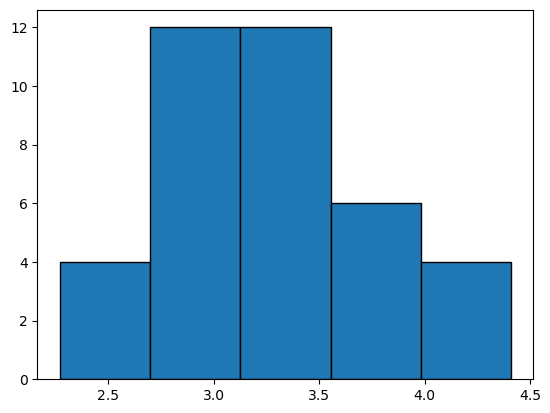

In [27]:
# ANSWER CELL
# plot a histogram of BOD using bins = 5 (simply copy the line of code from the text above)
plt.hist(bod, bins=5, ec='k') # SOLUTION

# display all figures
plt.show()

In [28]:
# ANSWER CELL
# assign the numeric values
max_freq = 12 # SOLUTION
max_bins = 2 # SOLUTION
print(f'The maximum frequency is {max_freq} and is observed for {max_bins} bins.')

The maximum frequency is 12 and is observed for 2 bins.


In [29]:
grader.check("q5.0")

q5.0 results: All test cases passed!

### Label your axes!!

Whenever you are presenting a plot, whether for a lab, homework, or project (and in your professional career), ALWAYS label your axes and add units where relevant. You can also add a title to your plot.

Let's re-plot the histogram for the `bod`, now adding axes labels and controlling the appearance of the figure. Run the code below to check it out! In all of the remaining figures, follow a similar format.

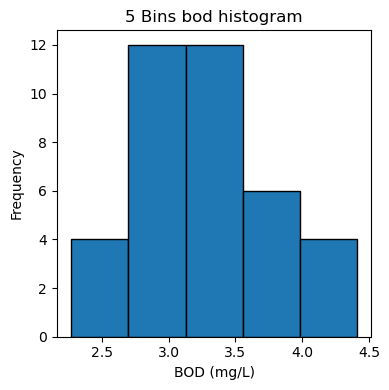

In [30]:
# create figure and axes
fig_1, ax_1 = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# specify number of bins
N = 5

# plot first axes (plot)
# set title, xlabel, and ylabel
ax_1.hist(bod, bins=N, ec='black')
ax_1.set(title='5 Bins bod histogram', 
         xlabel='BOD (mg/L)', 
         ylabel='Frequency')

# automatically adjust the size and positions
plt.tight_layout()

# display the figure 
plt.show()

### Trying Different Bin Numbers

<font color='red'>**Question 5.1.**</font> Modify the code below to make three histograms for `bod` with the following number of bins (0.5 pts):
1. The first plot should have `bins = 2`
2. The second/middle plot should have `bins = 10`
3. The third plot should have `bins = 50`

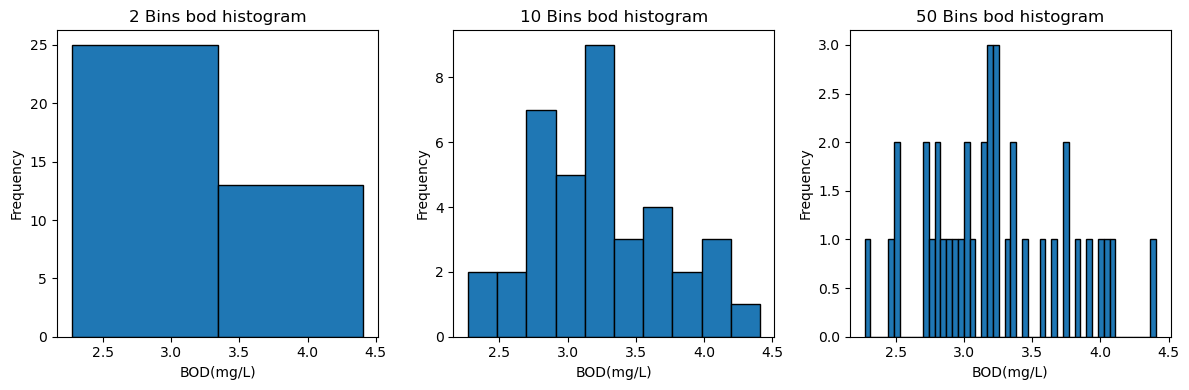

In [31]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Edit the code below to make three histogram subplots in 1 figure (only edit where you have ...)
# One way to do so is using plt.subplots(nrows, ncols)
# This will create subplots and organizes them in a grid-like structure

# I am providing you with many of the commands here for you to practice.

# create figure and axes
fig_2, ax_2 = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# plot first axes (plot)
# specify number of bins for first subplot
N = 2
# Save the plot as variable q5_1_0
q5_1_0 = ax_2[0].hist(bod, bins=N, ec='black') # using ax_2[0] because first subplot is index 0
# set title, xlabel, and ylabel
ax_2[0].set(title=f'{N} Bins bod histogram', 
            xlabel='BOD(mg/L)', 
            ylabel='Frequency')

# plot second axes (plot)
# first, specify the number of bins for the second plot
N = 10 # SOLUTION
# second, create the plot. The second plot will have index [1].
# Save the plot as variable q5_1_1
q5_1_1 = ax_2[1].hist(bod, bins=N, ec='black') # SOLUTION
# third, set title, xlabel, and ylabel
# BEGIN SOLUTION
ax_2[1].set(title=f'{N} Bins bod histogram', 
            xlabel='BOD(mg/L)', 
            ylabel='Frequency')
# END SOLUTION

# plot third axes (plot)
# specify number of bins
N = 50 # SOLUTION
# Save the plot as variable q5_1_2
q5_1_2 = ax_2[2].hist(bod, bins=N, ec='black') # SOLUTION
# set title, xlabel, and ylabel
# BEGIN SOLUTION
ax_2[2].set(title=f'{N} Bins bod histogram', 
            xlabel='BOD(mg/L)', 
            ylabel='Frequency')
# END SOLUTION

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

In [32]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<font color='red'>**Question 5.2.**</font> Based on your plots, which number of bins is optimal for this dataset? Assign your answer to the variable `q_5_2` as a string. (0.5 pts)

**A.** `bins = 2`\
**B.** `bins = 10`\
**C.** `bins = 50`

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

In [33]:
# ANSWER CELL
q_5_2 = "B" # SOLUTION
q_5_2

'B'

In [34]:
grader.check("q5.2")

q5.2 results: All test cases passed!
q5.2 - 1 message: Correct answer format.

### Histogram Plot with Frequency, Relative Frequency, and Density

So far, we have been specifying the total number of bins, which results in equal bin widths. You can alternatively specify the values for the bin edges, and thus, assign unequal bin widths. So in this part, we will specify the edges of the bins using:\
`bins=[2.2, 2.5, 3.2, 3.3, 3.8, 4.5]`

Also, by default, `plt.hist()` plots the frequency (i.e., count of the number of sample data that fall into each bin). We can alternatively plot proportions (i.e., relative frequency: frequency/sample size) or densities (proportions/bin width).

<font color='red'>**Question 5.3.**</font> Modify the code below and plot, in the same figure, three histograms for `bod` all using:\
`bins=[2.2, 2.5, 3.2, 3.3, 3.8, 4.5]`, such that (1 pt):

1. The first plot should have frequency on the y-axis (code already provided).
2. The second (middle) plot should have relative frequency on the y-axis. For this, you need to add between parentheses the parameter `weights=np.ones_like(bod)/len(bod)`, in addition to specifying the bins as defined above. This simply multiplies the data by 1/sample size, which would give us proportions.
3. The third plot should have density on the y-axis. For this, you need to to add between parentheses `density=True` (do not specify weights), in addition to specifying the bins as defined above.
4. For each plot, set the x-axis label to "BOD (mg/L)".
5. For each plot, set the correct y-axis label.
6. For each plot, set the correct title. The title should include whether the plot is for "frequency", "relative frequency", or "density". Also, the title should mention that this is a "histogram" for "BOD"

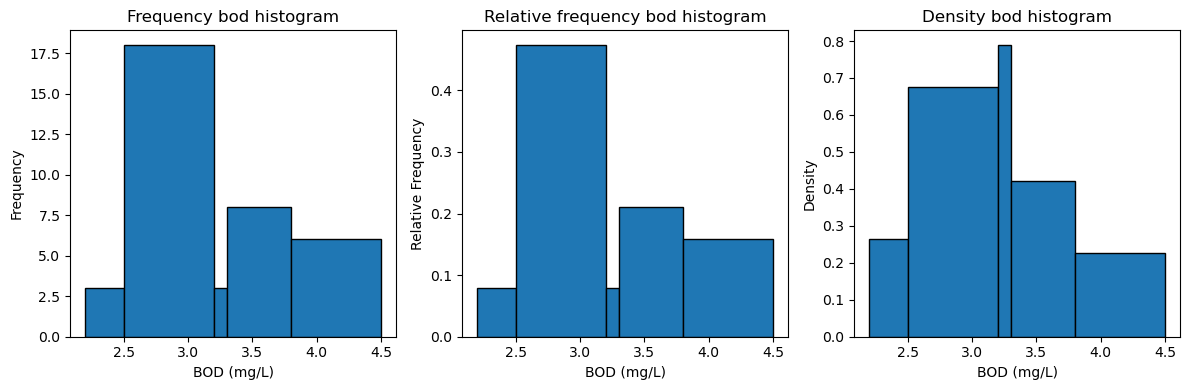

In [35]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Edit the code below to make three histogram subplots in 1 figure (only edit where you have ...)
# One way to do so is using plt.subplots(nrows, ncols)
# This will create subplots and organizes them in a grid-like structure

# I am providing you with many of the commands here for you to practice.

# create figure and axes
fig_3, ax_3 = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# specify bins edges (same for all three subplots)
bins = [2.2, 2.5, 3.2, 3.3, 3.8, 4.5]

# plot first axes (plot) for frequency
q5_3_0 = ax_3[0].hist(bod, bins=bins, ec='black') # using ax_3[0] for first subplot
# set title, xlabel, and ylabel
ax_3[0].set(title='Frequency bod histogram',
            xlabel='BOD (mg/L)', 
            ylabel='Frequency')

# plot second axes (plot) for relative frequency
# Save the plot as variable q5_3_1
q5_3_1 = ax_3[1].hist(bod, bins=bins, ec='black', weights=np.ones_like(bod)/len(bod)) # SOLUTION
# set title, xlabel, and ylabel
# BEGIN SOLUTION
ax_3[1].set(title='Relative frequency bod histogram',
            xlabel='BOD (mg/L)', 
            ylabel='Relative Frequency')
# END SOLUTION

# plot third axes (plot) for density
# Save the plot as variable q5_3_2
q5_3_2 = ax_3[2].hist(bod, bins=bins, ec='black', density=True) # SOLUTION
# set title, xlabel, and ylabel
# BEGIN SOLUTION
ax_3[2].set(title='Density bod histogram',
            xlabel='BOD (mg/L)', 
            ylabel='Density')
# END SOLUTION

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

In [36]:
grader.check("q5.3")

q5.3 results: All test cases passed!

<font color='red'>**Question 5.4.**</font> Based on your plot of frequency, relative frequency, and density using the given bin edges, which of the following statement(s) is(are) True? Assign ALL that apply to the variable `q5_4`. (0.5 pts)

**A.** The maximum density is around 0.8 and occurs between 3.2 and 3.3 mg/L \
**B.** It is appropriate to show a histogram of frequency in this case \
**C.** The three plots for frequency, relative frequency, and density all have the exact same shape, but different y-axis values \
**D.** It is appropriate to show a histogram of relative frequency in this case \
**E.** It is appropriate to show a histogram of density in this case

Answer in the next cell. Add each selected choice as a string and separate each two answer choices by a comma. For example, if you want to select `"A"` and `"B"`, your answer should be `"A", "B"`.\
Assign your answer to the given variable.
Remember to put quotes around each answer choice.

In [37]:
# ANSWER CELL
q5_4 = "A", "E" # SOLUTION
q5_4

('A', 'E')

In [38]:
grader.check("q5.4")

q5.4 results: All test cases passed!
q5.4 - 1 message: Correct answer format.

### Boxplots Using matplotlib.pyplot

Boxplots can be plotted using the [`plt.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

Run the code below to look at an example. We will plot three boxplots for random data `a`, `b`, and `c`.

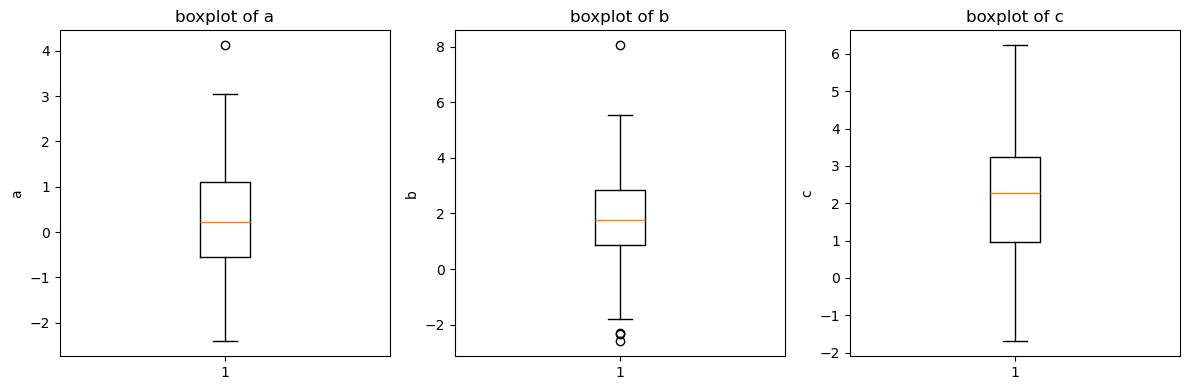

In [39]:
# randomly generate an array with 100 numbers
a = np.random.randn(100)

# randomly generate another array with 100 numbers
b = 2*(np.random.randn(100)+1)

# randomly generate another array with 100 numbers
c = 2*(np.random.randn(100)+1)

# create figure and axes
fig_4, ax_4 = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# plot first axes (plot)
# set title, xlabel, and ylabel
ax_4[0].boxplot(a)
ax_4[0].set(title='boxplot of a',
            ylabel='a')

# plot second axes (plot) 
# set title, xlabel, and ylabel
ax_4[1].boxplot(b)
ax_4[1].set(title='boxplot of b',
            ylabel='b')

# plot thid axes (plot) 
# set title, xlabel, and ylabel
ax_4[2].boxplot(c)
ax_4[2].set(title='boxplot of c',
            ylabel='c')

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

If we wish to compare the boxplots of `a`, `b`, and `c`, we should plot them on the same figure. Notice that the limits for the y-axes above are different, and thus, the above plots are not an effective way to compare `a`, `b`, and `c`.

Let's plot all boxplots together. This will provide a better graphical representation because we can effectively compare all data sets. Run the code below to create a better boxplot of `a`, `b`, and `c`.

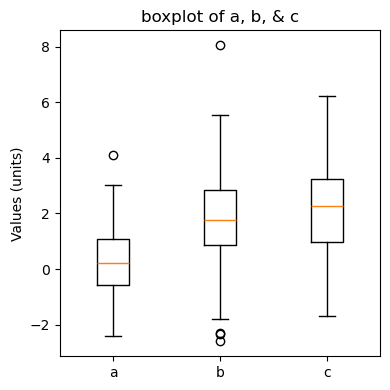

In [40]:
# create figure and axes
fig_5, ax_5 = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# boxplot of a, b, and c in one plot
ax_5.boxplot([a, b, c])
ax_5.set(title = 'boxplot of a, b, & c',
         xticks=[1, 2, 3], 
         xticklabels=["a", "b", "c"],
         ylabel='Values (units)')

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

### Boxplots for `bod`, `nit`, `amm` 

<font color='red'>**Question 6.0.**</font> Modify the code below to create three boxplots **in the same plot and in this order**: (1)`bod`, (2)`nit`, (3)`amm` (0.5 pts) .

Include the units, mg/L, in the y-axis label.

Set the x-axis tick labels equal to `['bod', 'nit', 'amm']`.

You can refer to the code above for an example.

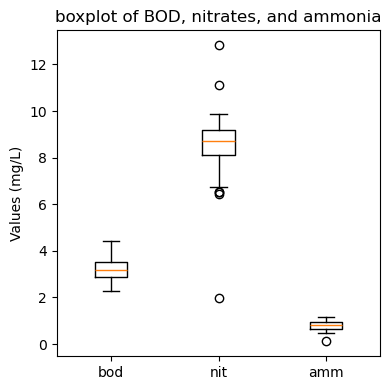

In [41]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# create figure and axes
fig_6, ax_6 = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# boxplot of bod, nit, and amm in one plot
# simply copy the code from above and modify it
# NOTE that the axes object is named ax_6. So, you should use ax_6.boxplot(...)
# Save the plot as variable q6_0
# set xticklabels and ylabel
q6_0 = ax_6.boxplot([bod, nit, amm]) # SOLUTION
# BEGIN SOLUTION
ax_6.set(title = 'boxplot of BOD, nitrates, and ammonia',
         xticks=[1, 2, 3], 
         xticklabels=['bod', 'nit', 'amm'],
         ylabel='Values (mg/L)')
# END SOLUTION

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

In [42]:
grader.check("q6.0")

q6.0 results: All test cases passed!

<font color='red'>**Question 6.1.**</font> Based on the boxplots for `bod`, `nit`, `amm`, which of the following statement(s) is(are) true? Assign ALL that apply to the variable `q6_1`. (0.5 pts)

**A.** The nitrates variable has the most number of outliers \
**B.** The ammonia variable has the lowest standard deviation \
**C.** The median for BOD is greater than that of nitrates \
**D.** The horizontal orange lines represent the means for each variable \
**E.** The nitrates data are negatively skewed (skewed to the left)

Answer in the next cell. Add each selected choice as a string and separate each two answer choices by a comma. For example, if you want to select `"A"` and `"B"`, your answer should be `"A", "B"`.\
Assign your answer to the given variable.
Remember to put quotes around each answer choice.

In [43]:
# ANSWER CELL
q6_1 = "A", "B", "E" # SOLUTION
q6_1

('A', 'B', 'E')

In [44]:
grader.check("q6.1")

q6.1 results: All test cases passed!
q6.1 - 1 message: Correct answer format.

### Scatter Plots Using matplotlib.pyplot

Scatter plots of bivariate data can be plotted using the [`plt.scatter(x, y)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

You can control the marker shape, size, fill color, edge color and many more. Click on the function above to read more about some of its parameters.

Run the code below to look at an example for data `a` and `b`.

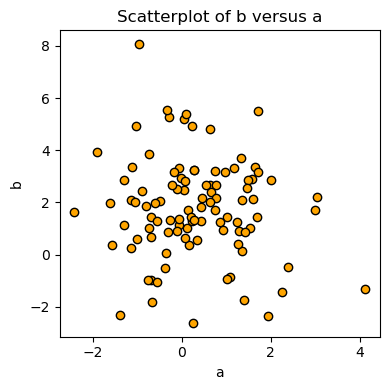

In [45]:
# create figure and axes
fig_7, ax_7 = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# scatter plot of b versus a
ax_7.scatter(a, b, c='orange', ec='k')
ax_7.set(title = 'Scatterplot of b versus a',
         xlabel = 'a',
         ylabel = 'b')

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

### Scatterplot for `bod` and `nit`

<font color='red'>**Question 7.0.**</font> Modify the code below to create a scatter plot of `bod` (y-axis) versus `nit` (x-axis) (0.25 pts).

You can refer to the code above for an example.

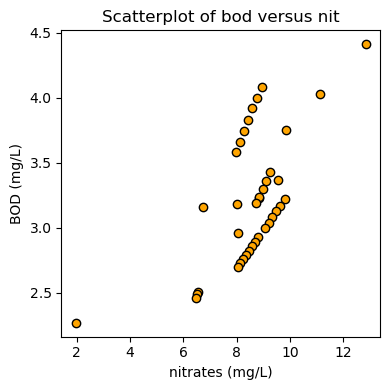

In [46]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

# create figure and axes
fig_8, ax_8 = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

# scatter plot
# simply copy the code from above and modify it
# NOTE that the axes object is named ax_8. So, you should use ax_8.scatter(...)
# Save the plot as variable q7_0
q7_0 = ax_8.scatter(nit, bod, c='orange', ec='k') # SOLUTION
# BEGIN SOLUTION
ax_8.set(title = 'Scatterplot of bod versus nit',
         xlabel = 'nitrates (mg/L)',
         ylabel = 'BOD (mg/L)')
# END SOLUTION

# automatically adjust the size and positions of the subplots to prevent overlaps
plt.tight_layout()

# display the figure 
plt.show()

In [47]:
grader.check("q7.0")

q7.0 results: All test cases passed!

<font color='red'>**Question 7.1.**</font> Based on your scatter plot, what can you tell about the association between BOD and nitrate measurements (positive, negative, none)? Assign your answer to the variable `q7_1` as a string. (0.25 pts)

**A.** There is a positive association, meaning, as Nitrates tend to increase, BOD tend to increase, on average. \
**B.** There is a positive association, meaning, as Nitrates tend to increase, BOD tend to decrease, on average. \
**C.** There is a negative association, meaning, as Nitrates tend to decrease, BOD tend to increase, on average. \
**D.** There appears to be no association. 

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

In [48]:
# ANSWER CELL
q7_1 = "A" # SOLUTION
q7_1

'A'

In [49]:
grader.check("q7.1")

q7.1 results: All test cases passed!
q7.1 - 1 message: Correct answer format.

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Finally, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congratulations on finishing this lab!


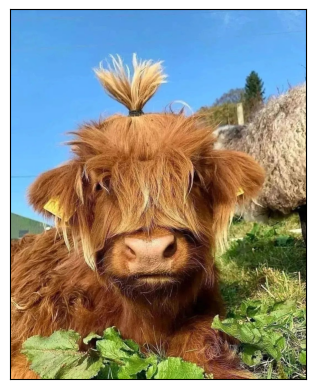

In [50]:
%matplotlib inline
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congratulations on finishing this lab!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [51]:
grader.check_all()

q1.0 results: All test cases passed!
q1.0 - 1 message: Correct answer format.

q1.1 results: All test cases passed!

q1.2 results: All test cases passed!

q2.0 results: All test cases passed!

q2.1 results: All test cases passed!
q2.1 - 1 message: Correct answer format.

q3.0 results: All test cases passed!

q3.1 results: All test cases passed!
q3.1 - 1 message: Correct answer format.

q3.2 results: All test cases passed!
q3.2 - 1 message: Correct answer format.

q4.0 results: All test cases passed!
q4.0 - 1 message: Correct answer format.

q5.0 results: All test cases passed!

q5.1 results: All test cases passed!

q5.2 results: All test cases passed!
q5.2 - 1 message: Correct answer format.

q5.3 results: All test cases passed!

q5.4 results: All test cases passed!
q5.4 - 1 message: Correct answer format.

q6.0 results: All test cases passed!

q6.1 results: All test cases passed!
q6.1 - 1 message: Correct answer format.

q7.0 results: All test cases passed!

q7.1 results: All test cas

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [52]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)